In [1]:
# simple linear model https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from   sklearn.linear_model    import LogisticRegression

# visualisation
from   matplotlib              import pyplot as plt

# train test split helper function https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from   sklearn.model_selection import train_test_split        

# data reading package https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

## Data Reading

In [2]:
# transpose your data such that strains are the rows and unitig as the columns
df             = pd.read_csv('data/Sonneicounts_MAF0.05_3745_uniqpatout.txt.gz', sep = '\t').set_index('pattern_id').T

# as the two text files are already aligned, create a new column that is your target variable
df['target']   = pd.read_csv('data/Sonneifullmar_1000B_y2_MSMcladeisolate_pheno.txt', sep = '\t').set_index('sample')

# preview head of the data
df.head()

pattern_id,1984461,1963566,1311439,5443051,1967526,1967618,1967538,1967532,1966930,1966931,...,297708,5055747,457072,710217,84367,297698,297690,2891997,311524,target
ERR1364143,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
ERR1364144,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
ERR1364145,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
ERR1364146,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
ERR1364147,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


## Defining the Train and Test Datasets

In [3]:
# define input and target output
X              = df.values[:,:-1]
y              = df.values[:,-1]

# split the data randomly (set random_state to control randomness for reproducible results)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.75)

## Logistic Regression

In [4]:
# train model
model          = LogisticRegression(random_state = 0).fit(X_train, y_train)

# feature importance for a Logistic Regression model is based on the weight coefficients
weights        = model.coef_.flatten()

# train and test accuracy
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9861259338313767)

#### Distribution of Coefficients

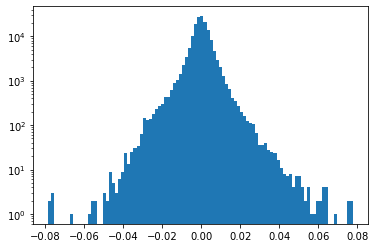

In [5]:
plt.hist(weights, bins = 100)
plt.yscale('log')
plt.show()

We can see that a lot of unitigs are non-informative with a few that stand out at either end of the histogram.

### unitig importance

In [6]:
# top 10 features indicating target = 0
display(df.columns[weights.argsort()[:10]])

# top 10 features indicating target = 1
display(df.columns[weights.argsort()[-10:]])

Index([ 605746,  944349,  605706, 5133947,  605725, 1803187, 1052245,  936108,
       5309891, 1349033],
      dtype='object', name='pattern_id')

Index([5435744,  860133, 5278000, 5277998,  860039,  862475, 5207876,  862476,
        558890,  558939],
      dtype='object', name='pattern_id')